<a href="https://colab.research.google.com/github/codestronaut/machine-learning-fundamental/blob/main/exercise001_classification_with_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

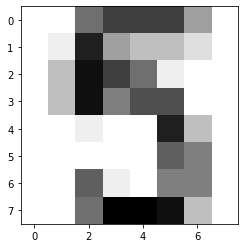

In [5]:
# Load the MNIST data from sklearn datasets and visualize the sample data
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

print(digits.keys())
print(digits['DESCR'])

print(digits.images.shape)
print(digits.data.shape)

plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# get X (features) & y (target) from digits.data & digits.target respectively
X = digits.data
y = digits.target

# create train sets and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# build KNN model
knn = KNeighborsClassifier(n_neighbors=7)

# train model
knn.fit(X_train, y_train)

# print the model accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


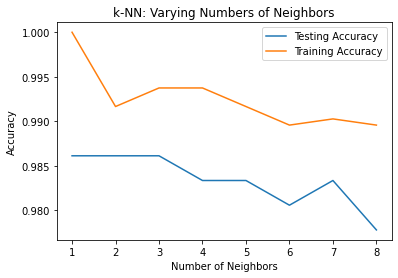

In [7]:
import numpy as np

# advance measure accuracy of the model
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)

  knn.fit(X_train, y_train)

  train_accuracy[i] = knn.score(X_train, y_train)
  test_accuracy[i] = knn.score(X_test, y_test)

# visualize
plt.title('k-NN: Varying Numbers of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Summary
Based on the above plot of k-NN accuracy for MNIST dataset, the best performance of the model that can be achieve is for k = 3, and k = 7. Otherwise the model will be underfitting